##Fundamentals of Statistics and Data Science with Python



In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import drive

## Perfect Numbers

###Write a Python function is_perfect_number(n) that checks whether a given integer n is a perfect number. The function should return True if n is a perfect number and False otherwise.

In [7]:
# Defining a function to return whether the input number is a perfect number or not
# Input: integer (n), Output: Boolean
def is_perfect_number(n):
    sum = 0
    # Finding the multiples of n from 1 to n=1 and adding them to the variable 'sum'
    for i in range(1,n):
        if (n%i == 0):
            sum = sum + i
    if (sum == n):
        return True
    else :
        return False

In [8]:
print(is_perfect_number(6))
print(is_perfect_number(28))
print(is_perfect_number(12))

True
True
False


## Describe and summarize the dataset

In [9]:
# Connecting my drive to google colab to access files on My Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Searching for the required file in My Drive
filename1 = 'data_invoices.xlsx'
search_path1 = '/content/drive/My Drive/Colab Notebooks'
file_path1 = None
for root, dirs, files in os.walk(search_path1):
  if filename1 in files:
    file_path1 = os.path.join(root, filename1)
    break
  df_invoices = pd.read_excel(file_path1)

In [11]:
# Viewing the first 5 rows of the data to determine the kind of data in the file
df_invoices = pd.read_excel(file_path1)
df_invoices.head(5)

,id_invoice,amount,age customer,items bought,credit card
0,1,163.5,43,7,0
1,2,138.8,39,5,0
2,3,175.9,48,7,1
3,4,157.5,45,11,1
4,5,600.0,43,2,0


### 1) Load the data_invoices.xlsx dataset and compute the following descriptive statistics for all continuous variables:
###(a) Mean
###(b) Median
###(c) Variance
###(d) Standard deviation
###(e) Minimum and maximum values
###(f) First and third quartiles

In [12]:
# Get the details mean, min, max, standard deviation and all quartiles of the 'amount' using describe function
description = df_invoices['amount'].describe()
print(description)

count    2000.000000
mean      154.153150
std        30.487148
min        20.000000
25%       134.975000
50%       154.750000
75%       172.525000
max       600.000000
Name: amount, dtype: float64


In [13]:
# Use the numpy function to calculate the measures of dispersion and measures of central tendancy
amount_values = df_invoices['amount'].values
mean_amount = np.mean(amount_values)
median_amount = np.median(amount_values)
variance_amount = np.var(amount_values)
std_amount = np.std(amount_values)

In [14]:
print('(a) Mean of amount is', round(mean_amount, 3))
print('(b) Median of amount is', round(median_amount, 3))
print('(c) Variance of amount is', round(variance_amount, 3))
print('(d) Standard deviation of amount is', round(std_amount, 3))
print('(e) Minimum and maximum are 20 and 600 respectively')
print('(f) First and third quartile values are 134.975 and 172.525 respectively')


(a) Mean of amount is 154.153
(b) Median of amount is 154.75
(c) Variance of amount is 929.001
(d) Standard deviation of amount is 30.48
(e) Minimum and maximum are 20 and 600 respectively
(f) First and third quartile values are 134.975 and 172.525 respectively


###2) For the categorical variables, count the occurrences of each unique value.

In [15]:
# Count the number of times each unique value (that is, 1 and 0) appears in 'credit card'
credit_card_count = df_invoices['credit card'].value_counts()
print(credit_card_count)

credit card
1    1405
0     595
Name: count, dtype: int64


###3) Choose the most appropriate visuals to display the distribution of each continuous variable. Justify your choice.

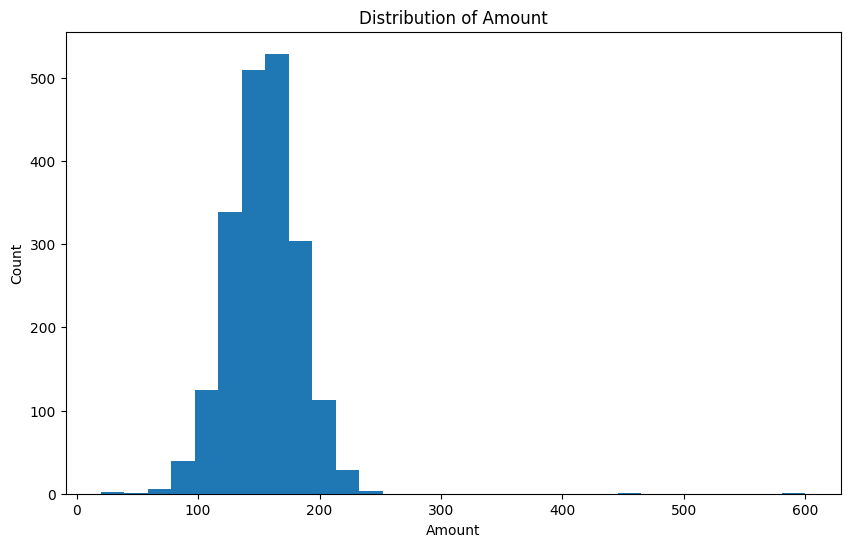

In [21]:
# Creating histogram to represent data in 'amount'
plt.figure(figsize = (10,6))
amount_hist = plt.hist(amount_values, 30)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Amount')
plt.show()

The only continuous variable in this dataframe is the 'Amount' field. To represent this data I have chosen a histogram - since the data is **continuous**, the best way to **segregate and interpret** it is **using bins**. This way we can observe whether the data that we have also follows a **normal distribution**. Recognising this helps us use many different functions on the data we have.

###4) Choose the most appropriate visuals to display the frequency of each value for categorical variables. Justify your choice.

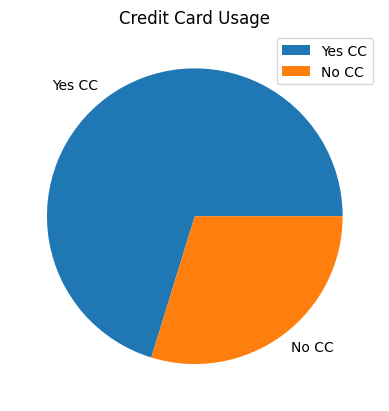

In [22]:
# Creating a pie chart for credit card (CC) usage
plt.pie(credit_card_count, labels = ('Yes CC', 'No CC'))
plt.title('Credit Card Usage')
plt.legend()
plt.show()

The only relevant categorical variable in this dataframe is the 'Credit Card' field. Since this indicates whether a person has used their credit card or not, using a pie chart helps us correctly visualise the **ratio of people in each category**. Considering that the most important function of the graph is to express the frequency of each value in this field, seeing this in the form of a pie chart which can be **commonly understood** and **easily interpreted** by anyone looking at the analysis is the best approach.

(In the given data sheet, the other two relevant variables (customer age and items bought) are both discrete variables. It might not make much sense to look at these variables individually but they can be utilised well to understand the correlation between multiple different variables in the later part of the assignment)

###5) Compute the correlation between the column amount and age customer, as well as between amount and items bought.

In [17]:
# Writing a function to calculate correlation between two parameters in a particular dataframe
# Input: name of the dataframe, variable1 and variable2 from the dataframe, Output: pearson's correlation coefficient between the two variables
def correl(df, x, y):
  x1 = df[x]
  y1 = df[y]
  Correlation,_ = stats.pearsonr(x1, y1)
  return print('The correlation between', x, 'and', y, 'is', round(Correlation, 3))

In [18]:
correl(df_invoices, 'amount', 'age customer')
correl(df_invoices, 'amount', 'items bought')

The correlation between amount and age customer is 0.615
The correlation between amount and items bought is 0.235


###6) Interpret the correlation results.



Based on the values we get for each of the correlations, we can tell that:

*   There is a morderately high correlation between the amount and the customer age. That implies that the amount value is **morderately dependent** on the customer's age. In other words, changes in customer's age will result in purchases of different amounts.
*   There is a very low correlation between the amount and the number of items bought. That implies that the amount value is **very weakly dependent** on the number of items bought. In other words, the number of items bough does not impact the amount paid very much.

###7) Choose the most appropriate visualization to summarize the distribution of the amounts paid by clients who used a debit card and those who did not. Justify your choice.

Text(0.5, 1.0, 'Comparison of Amounts based on Credit Card Usage')

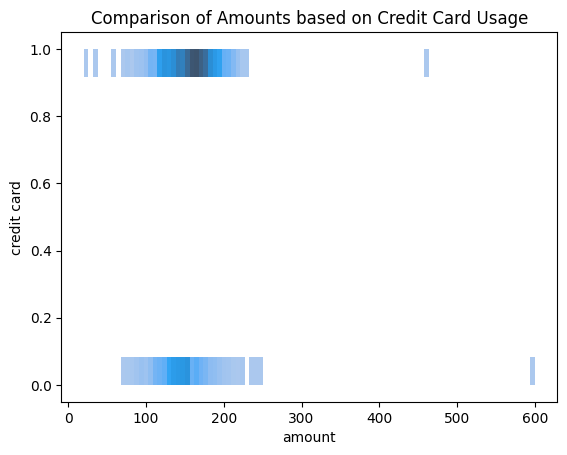

In [25]:
# Graphing the distribution of the amounts paid by clients who used a credit card and those who did not
sns.histplot(df_invoices, x='amount', y='credit card')
plt.title('Comparison of Amounts based on Credit Card Usage')

Since we have **only been given the values of if a customer has used a credit card or not**, it is difficult to confirm if all the customers who did not use a credit card have used a debit card instead or have used any other modes of payment. If we are assuming that customers who did not use a credit card (at value '0') have used a debit card, then the above graph can be interpreted such that, the representation for credit card value **'1' shows people who did not use a debit card** and the representation for credit card value **'0' shows people who used a debit card**.

Using the histplot function in Seaborn, we can plot a **histogram density plot** that helps us best visualise the **parts in the plot that have the most values concentrated** in it. For example, based on the above graph, we can see that there is a higher concentration of people whi have used credit cards and have paid amounts between 150 and 180 approximately. We can also see that the concentration of users who have not paid with a credit card lies in the region between 120 and 160 approximately.

##Linear Regression

###1) Build a linear regression model where the dependent variable is amount, and the independent variables are age customer, items bought and credit card.
###(a) Report the coefficients and intercept of the model.
###(b) Interpret the meaning of each coefficient.
###(c) Compute and report the R-squared statistic and explain what it tells you about the model’s fit.

In [27]:
# Calculating the coefficients and intercept of the linear regression model (dependent: amount, independent: age customer, items bought, credit card)
# Collect all dependent and independent values in the respective variables
ind_var = df_invoices[['age customer', 'items bought', 'credit card']].values
dep_var = df_invoices[['amount']].values
# Use LinearRegression function to find coefficients and intercept with best fit
lin_reg_model = LinearRegression().fit(ind_var, dep_var)
coefficients = lin_reg_model.coef_
intercept = lin_reg_model.intercept_
print('(a) The coefficients of the customer age, items bought and credit card usage are', coefficients, 'respectively.')
print('The intercept is', intercept)

(a) The coefficients of the customer age, items bought and credit card usage are [[3.50461604 0.76344514 6.0748125 ]] respectively.
The intercept is [2.94902997]


(b) Each of the cofficients represent the how much a **one unit change** in each of the independent variables **changes the dependent variable**. So,
*   if the **age of the customer** changes by 1 year, the amount will change by approximately **3.50** (currency)
*   if the **number of items bought** changes by 1, the amount will change by approximately **0.76** (currency)
*   if the **credit card** usage option changes, the amount will change by approximately **6.07** (currency)

The **intercept** shows us the **baseline** of what the value of the amount will be **when none of the other independent factors are influencing** it. In this situation, the intercept does not give us very relevant information.

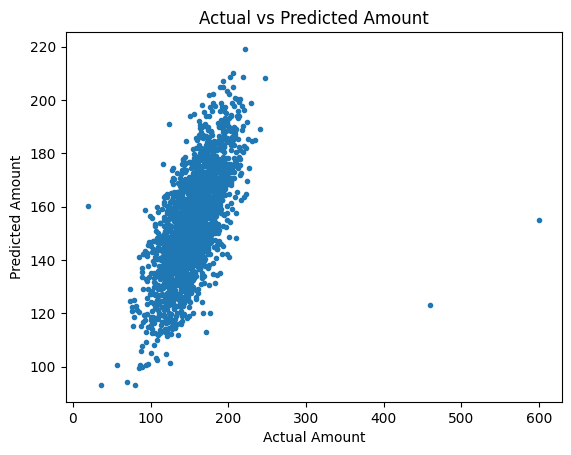

(c) The R-squared value of this linear regression is 0.40042722528249064


In [31]:
# Calculating the value of R^2 for the above linear regression model
amount_pred = lin_reg_model.predict(ind_var)
plt.plot(dep_var, amount_pred, '.')
plt.title('Actual vs Predicted Amount')
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.show()
print(f'(c) The R-squared value of this linear regression is {lin_reg_model.score(ind_var,dep_var)}')

Considering that R<sup>2</sup> is approximately 0.4 we can understand that the correlation between the independent variables (age customer, items bought and credit card usage) and the dependent variable (amount) is **morderate**. A 0.4 correlation coefficient means that the **predictor variables are able to explain only 40% of the variations in the amount values**.

###2) Use the model to calculate the Root Mean Square Error (RMSE).

In [32]:
# Calculating the root mean squared error using numpy
rmse = np.sqrt(mean_squared_error(dep_var, amount_pred))
print('The root mean squared error is', rmse )

The root mean squared error is 23.60093170066717


###3) Interpret the RMSE value and what it indicates about the model’s performance.

This means that the **average deviation** of the predicted amount values from the actual amount values is **approximately 23.60 (Currency)** - which is still significant. Hence, the **goal is to minimise the RSME** for a model. A smaller RMSE means a model that **predicts better**.

##Inference and Hypothesis Testing

###1) Compute 95% confidence intervals for the sample means of age customer and amount.

In [34]:
# Defining a function to find the average mean of all sample means and average mean of all sample standard deviations of a particular column
# Input: sample size, number of samples and parameter to find mean and SE of, Output: a list with the average mean and average standard error
def mean_SE(samp_size, num_samples, column):
  # Creating a zero array to store the sample means and sample stds
  sample_means = np.zeros(num_samples)
  sample_stds = np.zeros(num_samples)
  for i in range(num_samples):
    params = []
    sample = np.random.choice(df_invoices[column], samp_size)
    m = np.mean(sample)
    sigma = np.std(sample)
    sample_means[i] = m
    sample_stds[i] = sigma
    avg_mean = np.mean(sample_means)
    avg_std = np.std(sample_means)
    # Creating a list with the avg mean and avg std
    params.append(avg_mean)
    params.append(avg_std)
  return params

In [35]:
print(mean_SE(100, 10000, 'amount'))
print(mean_SE(100, 10000, 'age customer'))

[154.1581501, 3.0467876240017104]
[40.067378000000005, 0.5024157094637866]


In [36]:
# Defining a function to find the confidence intervals of the desired parameter
# Input: sample size, number of samples and parameter to find CI of, Output: confidence intervals of the parameter
def CI(samp_size, num_samples, column):
  ci_95 = stats.norm.interval(0.95)
  CI = (mean_SE(samp_size, num_samples, column)[0] + mean_SE(samp_size, num_samples, column)[1] * ci_95[0], mean_SE(samp_size, num_samples, column)[0] + mean_SE(samp_size, num_samples, column)[1] * ci_95[1])
  return CI

In [37]:
print('The confidence intervals of the Amount field are', CI(100, 10000, 'amount'))
print('The confidence intervals of the Age Customer field are', CI(100, 10000, 'age customer'))

The confidence intervals of the Amount field are (148.2036788980976, 160.11362659880064)
The confidence intervals of the Age Customer field are (39.08276926046957, 41.05317788680952)


###2) Evaluate the claim: “People who used a debit card paid higher amounts.”. Describe the hypothesis test you would perform to assess this claim and explain the logic behind your chosen method.

For this claim we will consider a **two-sided test** since there are **multiple outcomes** that will **impact our decision making**.

The H<sub>0</sub> (null hypothesis) and H<sub>1</sub> (alternate hypothesis) that we will consider will be:

**H<sub>0</sub>** : Average amount spent by debit card (DC) users is = average amount spent by non-debit card (NDC) users

**H<sub>1</sub>** : Average amount spent by debit card (DC) users is ≠ average amount spent by non-debit card (NDC) users

Considering these two hypotheses, we know that in this situation, the **rejection region will be on both sides** of the acceptance region. So, when the Z value that we calculate is **lesser than the lower Z<sub>α</sub>** or the Z value is **greater than the higher Z<sub>α</sub>** value, the **null hypothesis will be rejected**.

The reason for choosing H<sub>0</sub> and H<sub>1</sub> as seen above is because **H<sub>0</sub> represents a default or baseline assumption**. If this proves true there is no strategic change that we would have to make.
On the other hand if **H<sub>0</sub> is rejected**, **we will have to make strategic changes** such as:

*   **If DC users spend more:** How do we obtain more DC users to maximise sales + how do we make NDC users spend more.
*   **If DC users spend less:** How do we obtain more NDC users to maximise sales + how do we make DC users spend more.



##Time series analysis

###1) Load the MSFT.csv dataset and create time series plots for the columns Close and Volume.

In [39]:
# Searching for the required file on My Drive
filename2 = 'MSFT.csv'
search_path2 = '/content/drive/My Drive/Colab Notebooks'
file_path2 = None
for root, dirs, files in os.walk(search_path2):
  if filename2 in files:
    file_path2 = os.path.join(root, filename2)
    break
  df_TimeSeries = pd.read_csv(file_path2)

In [40]:
# Viewing the first 5 rows of the data to determine the kind of data in the csv file
df_TimeSeries = pd.read_csv(file_path2)
df_TimeSeries.head(5)

,Date,Open,High,Low,Close,Volume
0,19/07/2023,361.750000,362.459991,352.440002,355.079987,39732900
1,20/07/2023,353.570007,357.970001,345.369995,346.869995,33778400
2,21/07/2023,349.149994,350.299988,339.829987,343.769989,69368900
3,24/07/2023,345.850006,346.920013,342.309998,345.109985,26678100
4,25/07/2023,347.109985,351.890015,345.070007,350.980011,41637700


In [41]:
# Making the Date the index of the dataframe permanently
df_TimeSeries.set_index('Date', inplace = True)

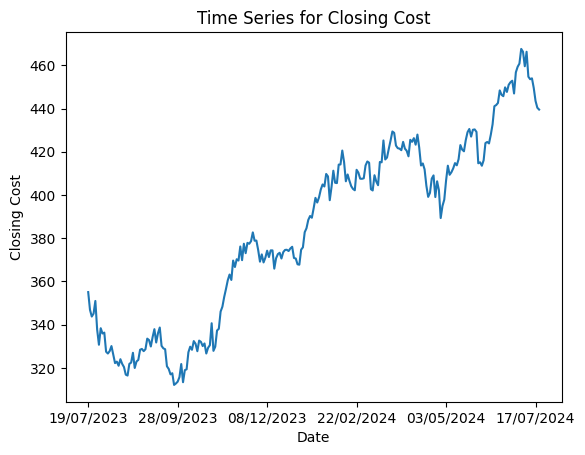

In [44]:
# Creating the time series plots for the column Close
df_TimeSeries['Close'].plot()
plt.title("Time Series for Closing Cost")
plt.xlabel("Date")
plt.ylabel("Closing Cost")
plt.show()

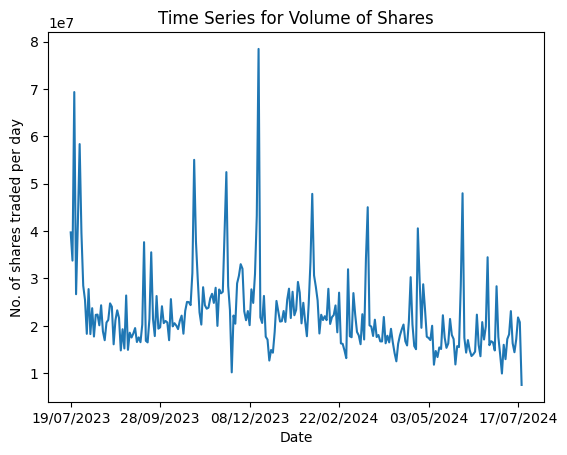

In [45]:
# Creating the time series plots for the column Volume
df_TimeSeries['Volume'].plot()
plt.title("Time Series for Volume of Shares")
plt.xlabel("Date")
plt.ylabel("No. of shares traded per day")
plt.show()

###2) Analyze and describe any seasonality and trend observed in both time series.

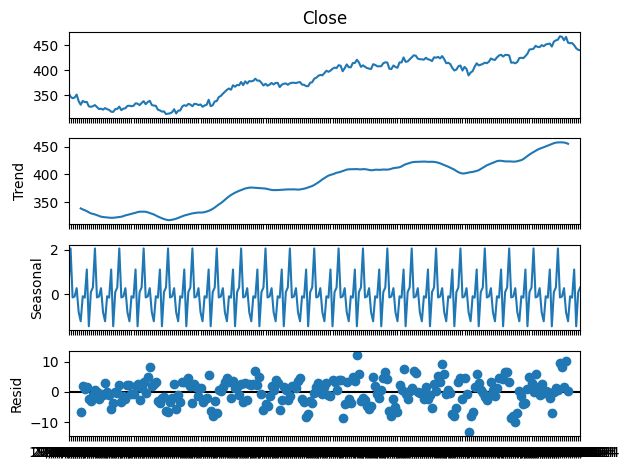

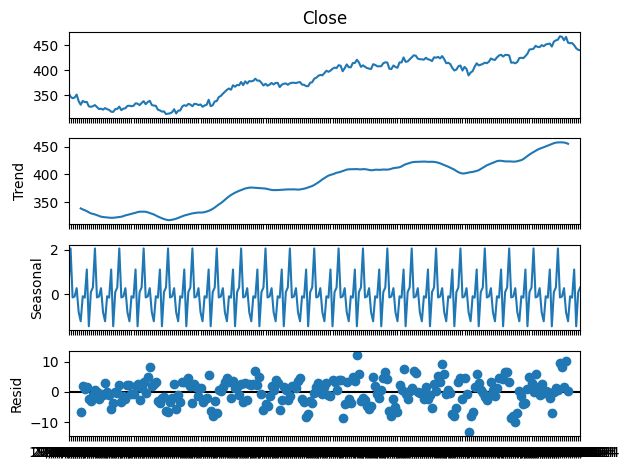

In [49]:
# Decompose the Time Series graph for Close using Seasonal Decompose
result_close = seasonal_decompose(df_TimeSeries['Close'], model = 'additive', period=12)
result_close.plot()


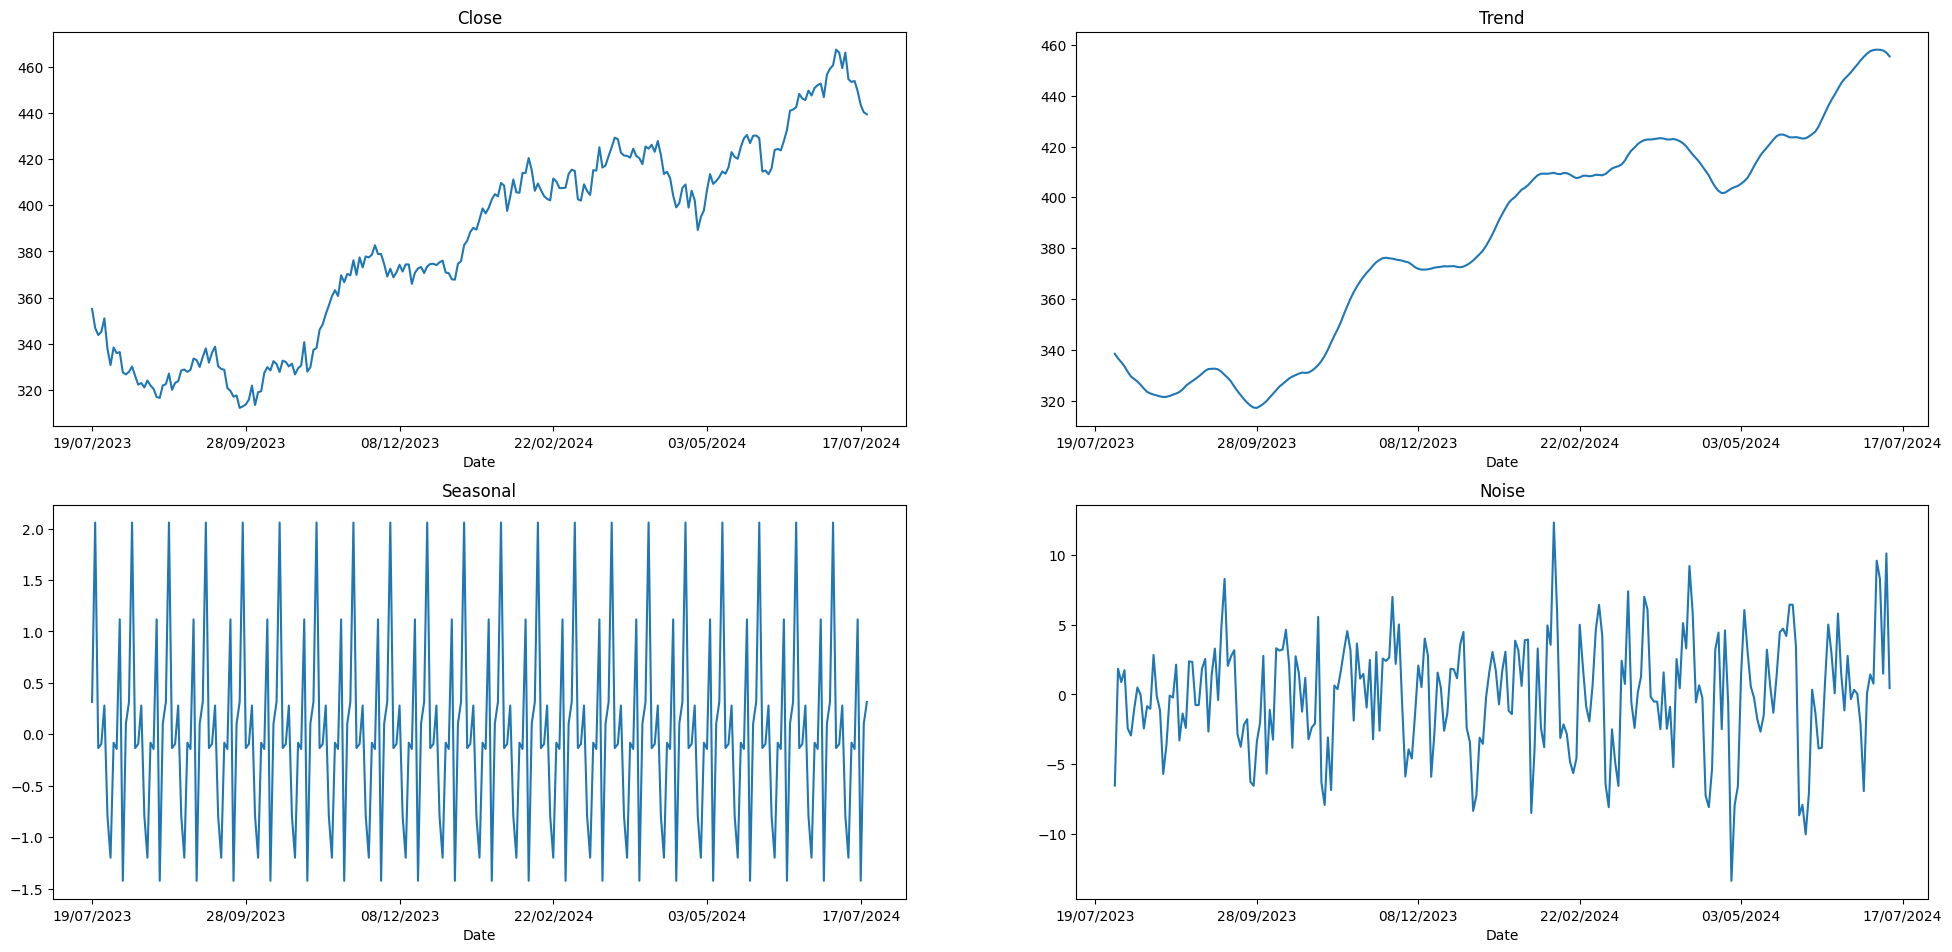

In [50]:
# Storing data from the above decomposition in the required variables
trend_close = result_close.trend
seasonal_close = result_close.seasonal
residual_close = result_close.resid

# Using the above decomposition to create a more comprehensible version of the graphs
plt.figure(figsize = (10,3))
plt.subplot(2, 2, 1)
df_TimeSeries['Close'].plot(title = 'Close')

plt.subplot(2, 2, 2)
trend_close.plot(title = 'Trend')

plt.subplot(2, 2, 3)
seasonal_close.plot(title = 'Seasonal')

plt.subplot(2, 2, 4)
residual_close.plot(title = 'Noise')

plt.subplots_adjust(right = 2, top = 3)
plt.show()

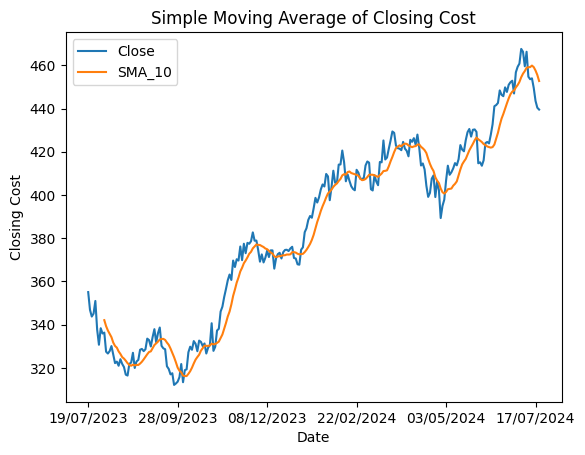

In [52]:
# Plotting a graph with the Simple Moving Average to help with smoothening and easier analysis
df_TS = df_TimeSeries.loc[:,['Close']]
df_TS['SMA_10'] = df_TS['Close'].rolling(window = 10).mean()
df_TS.plot()
plt.title("Simple Moving Average of Closing Cost")
plt.xlabel("Date")
plt.ylabel("Closing Cost")
plt.show()

**The Time Series graph of the variable Close** seems to be **additive** in nature when we decompose it and look at the simple moving average of the same. We can see that the **trend line is a little erratic** - there seems to be a **dip or a plateau every two months approximately** and then **a rise after that**. We can see that the **overall trend is increasing** in nature.
Given that the trend line changes so much it is **difficult to gauge the seasonality** with complete accuracy.

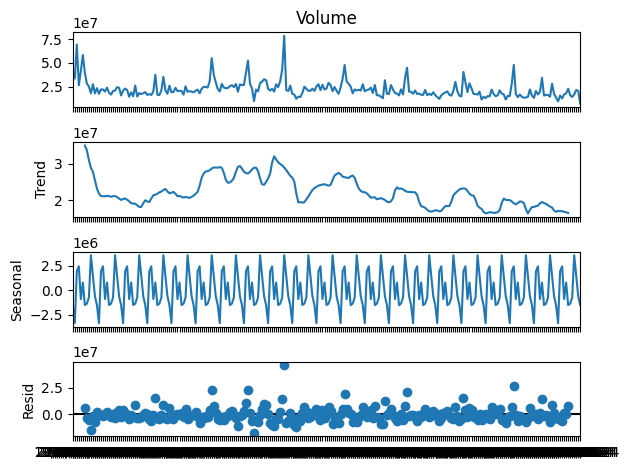

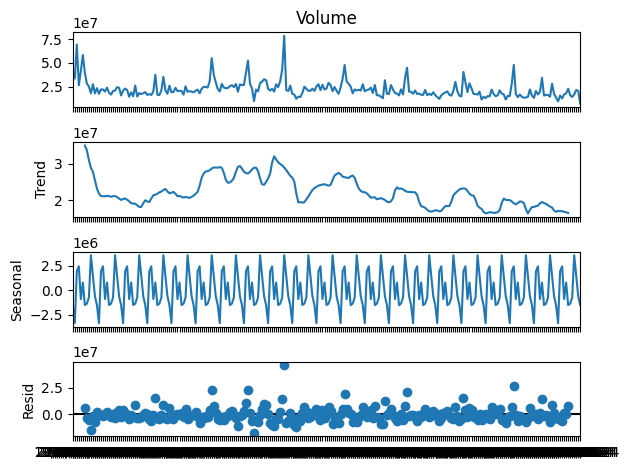

In [53]:
# Decompose the Time Series graph for Volume using Seasonal Decompose
result_volume = seasonal_decompose(df_TimeSeries['Volume'], model = 'additive', period=12)
result_volume.plot()

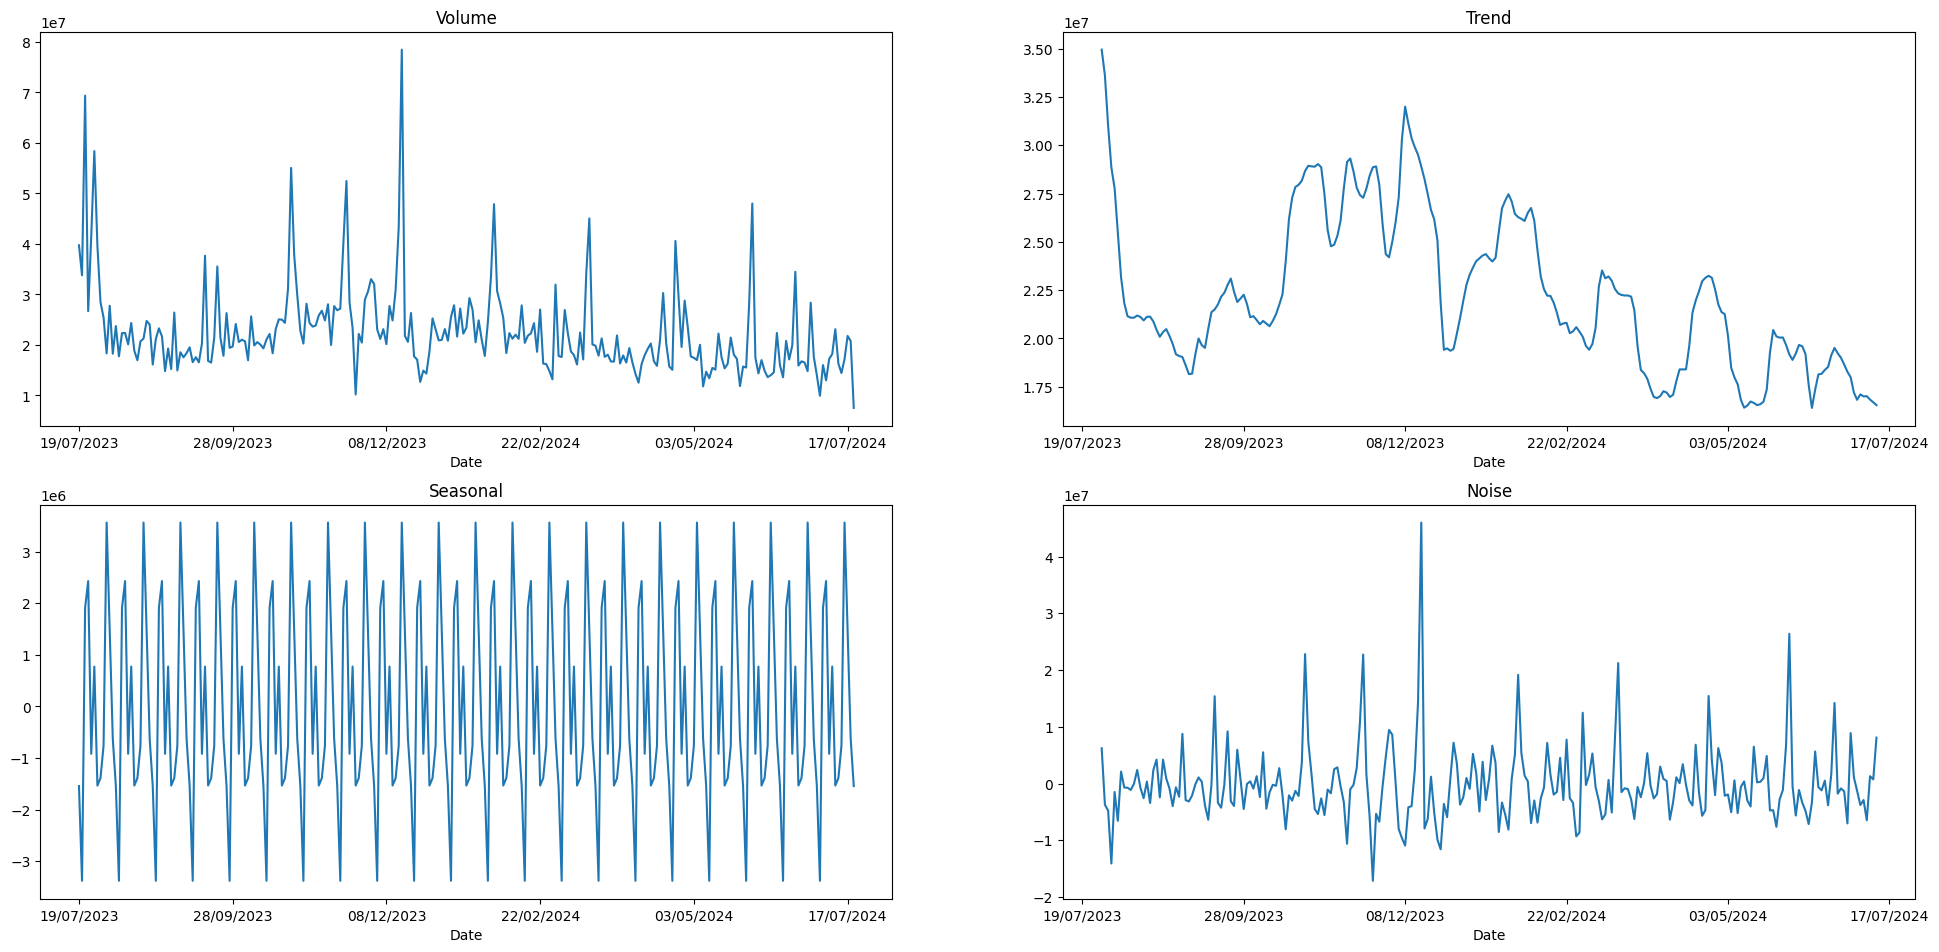

In [54]:
# Storing data from the above decomposition in the required variables
trend_volume = result_volume.trend
seasonal_volume = result_volume.seasonal
residual_volume = result_volume.resid

# Using the above decomposition to create a more comprehensible version of the graphs
plt.figure(figsize = (10,3))
plt.subplot(2, 2, 1)
df_TimeSeries['Volume'].plot(title = 'Volume')

plt.subplot(2, 2, 2)
trend_volume.plot(title = 'Trend')

plt.subplot(2, 2, 3)
seasonal_volume.plot(title = 'Seasonal')

plt.subplot(2, 2, 4)
residual_volume.plot(title = 'Noise')

plt.subplots_adjust(right = 2, top = 3)
plt.show()

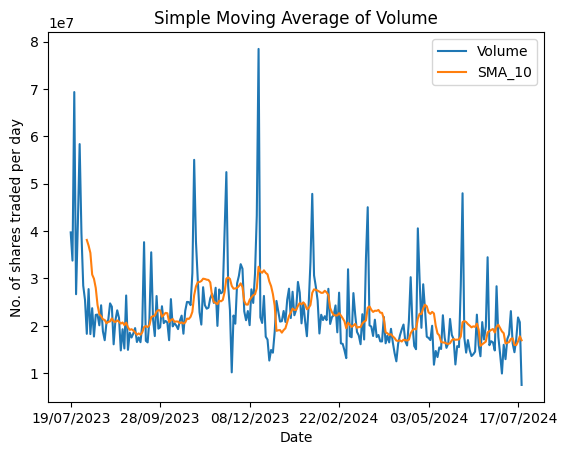

In [57]:
# Plotting a graph with the Simple Moving Average to help with smoothening and easier analysis
df_TS = df_TimeSeries.loc[:,['Volume']]
df_TS.head()
df_TS['SMA_10'] = df_TS['Volume'].rolling(window = 10).mean()
df_TS.plot()
plt.title("Simple Moving Average of Volume")
plt.xlabel("Date")
plt.ylabel("No. of shares traded per day")
plt.show()

**The Time Series graph of the variable Volume** seems to be **additive** in nature as well. When we decompose it, we see that the **noise levels concentration is lower for the additive graph** especially. We can see that the **trend line is a very erratic** - there seems to be an **alternating rise and fall in the numbers during each month**. We can see that the **overall trend line does not drastically increase or decrease**. Given that the trend line changes so much it is difficult to gauge the seasonality with complete accuracy. But it seems that **every month consists of a part where there is a rise and a dip.**

###3) Compute the correlation between Close and Volume. Interpret the result. Does the result align with what you observe in the plots ?

In [58]:
# Using the correl function defined before to find the correlation between Close and Volume
correl(df_TimeSeries, 'Close', 'Volume')

The correlation between Close and Volume is -0.245


The **negative correlation** between these two parameters implies that they have an **inverse relationship** between each other, that is, when the value of one increases, the value of the other will decrease. The low value of the Pearson's coefficient (0.245) means that there is a **very weak correlation** between these two variables. We can see this from the above graphs, there is **no strong similarity/common factor in the way both graphs progress**. Even when the volume increases or decreases sharply, there is no significant sharp change in the closing cost value and vice versa.

###4) Do you observe any outliers in the two time series ? Are there any points where the trajectory of the time series shows a noticeable shift or change ?

**Close:** In this time series graph, there don't seem to be a lot of dramatic outliers. **Most of the data points seem to follow the trajectory** of the time series without very significant change.

**Volume:** In this time series graph, with the help of the simple moving average, we notice that there are many outliers. The **sudden spikes and dips** in the graph are where the outlying data values are present. The quick increases around **October, November and December, 2023** in the original time series graph show some of the random increases in data points (or outliers).